In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df["Na_to_K"]
# tento stlpec odkazuje na pomer sodika k drasliku v ludskom tele 
# (odporucany je 1:3, teda prijem draslika by mal byt 3x vacsi)

0      25.355
1      13.093
2      10.114
3       7.798
4      18.043
        ...  
195    11.567
196    12.006
197     9.894
198    14.020
199    11.349
Name: Na_to_K, Length: 200, dtype: float64

In [4]:
print('Počet prázdnych dát v datasete: ' + str(df.isnull().sum().sum())) # overenie, ci dataframe neobsahuje nejake prazdne zaznamy

Počet prázdnych dát v datasete: 0


In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
print(f'''Drugs: {df['Drug'].unique()}, 
Sex: {df['Sex'].unique()}
Blood Pressure: {df['BP'].unique()}
Cholesterol: {df['Cholesterol'].unique()}''')
# vypis hodnot jednotlivych parametrov pre vacis prehlad
# typy liekov: A, B, C, X, Y
# pohlavie: Male, Female
# parameter krvny tlak ma 3 urovne: High, Low, Normal
# cholesterol ma 2 urovne: High, Normal

Drugs: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB'], 
Sex: ['F' 'M']
Blood Pressure: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']


# Vizualizácia dát
Rozhodol som sa vizualizovať tento dataframe na základe veku a pomeru sodíka k draslíku (Na_to_K) pre štyri parametre - Pohlavie (Sex), krvný tlak (BP), hladina cholesterolu (Cholesterol) a samotný liek (Drug)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

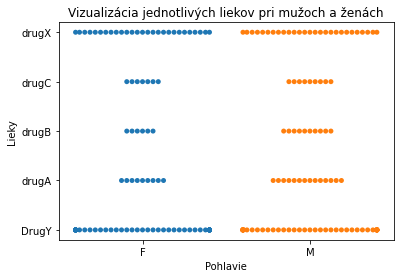

In [8]:
sns.swarmplot(x='Sex', y='Drug', data=df)
plt.xlabel('Pohlavie')
plt.ylabel('Lieky')
plt.title("Vizualizácia jednotlivých liekov pri mužoch a ženách")
plt.show()

Vizualizácia jednotlivých liekov pri mužoch a ženách nevykazuje žiadnu dôležitú odchýlku alebo vzorku. Pohlavie teda nemá vplyv na výber správneho lieku.

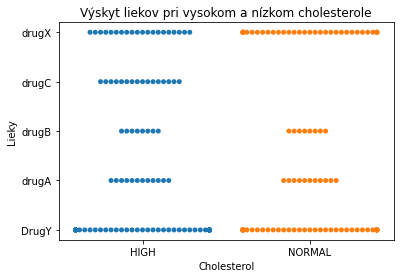

In [9]:
sns.swarmplot(x='Cholesterol', y='Drug', data=df)
plt.xlabel('Cholesterol')
plt.ylabel('Lieky')
plt.title("Výskyt liekov pri vysokom a nízkom cholesterole")
plt.show()

Z tejto vizualizácie je vidieť dva dôležité fakty:

1. Liek C je len pre ľudí, ktorí majú vysoký cholesterol
2. Ostatné lieky môžu byť použité pri všetkých zvyšných prípadoch 

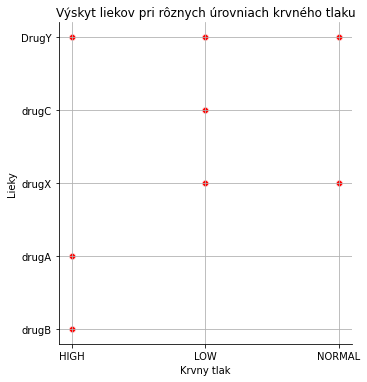

In [10]:
plt.rcParams["figure.figsize"] = (10,3)
sns.relplot(x='BP', y='Drug', data=df, color='red')
plt.xlabel('Krvny tlak')
plt.ylabel('Lieky')
plt.title("Výskyt liekov pri rôznych úrovniach krvného tlaku")
plt.grid()

Podľa tejto vizualizácie môžeme vidieť určitú koreláciu druhov liekov s danou úrovňou cholesterolu:
1. Liek Y je možné použiť pri všetkých úrovniach
2. Liek A a liek B len pri vysokých úrovniach
3. Liek X len pri nízkych úrovniach

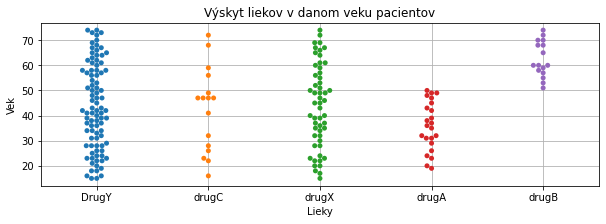

In [11]:
sns.swarmplot(x='Drug',y='Age', data=df)
plt.xlabel('Lieky')
plt.ylabel('Vek')
plt.title("Výskyt liekov v danom veku pacientov")
plt.grid()

Táto vizualizácia mi pomohla pochopiť najmä:

1. Liek B je len pre ľudí starších, ako 50 rokov
2. Liek A je len pre ľudí od 20 - 50 rokov
3. Liek C sa vyskytuje najmenej
4. Liek Y vyzerá byť, ako najbežnejší zo všetkých, môže to byť liek proti chrípke / nachladnutiu

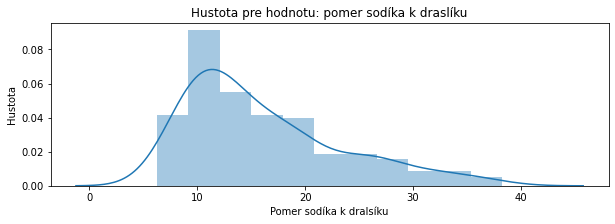

In [12]:
sns.distplot(df['Na_to_K'])
plt.xlabel('Pomer sodíka k dralsíku')
plt.ylabel('Hustota')
plt.title("Hustota pre hodnotu: pomer sodíka k draslíku")
plt.show()

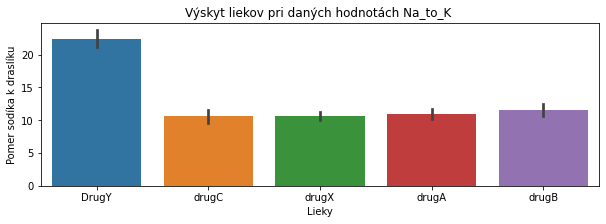

In [13]:
sns.barplot(x = 'Drug', y = 'Na_to_K', data = df)
plt.xlabel('Lieky')
plt.ylabel('Pomer sodíka k draslíku')
plt.title("Výskyt liekov pri daných hodnotách Na_to_K ")
plt.show()

- Väčšina ľudí má podobný pomer sodíka k draslíku
- Všetky lieky okrem lieku Y sú používané pri rovnakých hladinách sodíka k draslíku

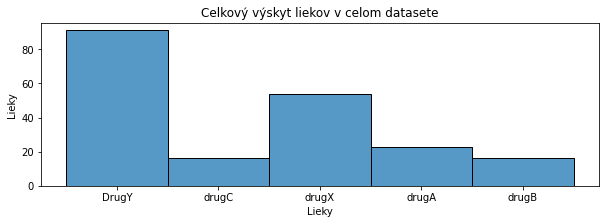

In [14]:
sns.histplot(x = 'Drug', data = df)
plt.xlabel('Lieky')
plt.ylabel('Lieky')
plt.title("Celkový výskyt liekov v celom datasete")
plt.show()

# Predspracovanie dát

In [15]:
# je potrebne este predspracovat kategoricke premenne pohlavie (sex), krvny tlak (BP) a hladinu cholesterolu (Cholesterol)
# funckia get_dummies mi prevedie kategoricku premennu na fiktivne premenne, teda dostanem nove stlpce s nulami
# a jednotkami, dalej mozem pracovat s cislami
dummies = pd.get_dummies(df[['Sex', 'BP', 'Cholesterol']])
dummies.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,1,0,1,0,0,1,0
1,0,1,0,1,0,1,0
2,0,1,0,1,0,1,0
3,1,0,0,0,1,1,0
4,1,0,0,1,0,1,0


In [16]:
# naslednuje spojenie fiktivneho dataframu dummies s mojim povodnym dataframeom df 
df = pd.concat([df,dummies], axis = 1)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,F,HIGH,HIGH,25.355,DrugY,1,0,1,0,0,1,0
1,47,M,LOW,HIGH,13.093,drugC,0,1,0,1,0,1,0
2,47,M,LOW,HIGH,10.114,drugC,0,1,0,1,0,1,0
3,28,F,NORMAL,HIGH,7.798,drugX,1,0,0,0,1,1,0
4,61,F,LOW,HIGH,18.043,DrugY,1,0,0,1,0,1,0


In [17]:
# ked uz mam prevedene kategoricke premenne na ciselne pre kazdy zaznam, mozem z dataframeu vymazat povodne stlpce
# sex, BP a Cholesterol
df = df.drop(['Sex', 'BP', 'Cholesterol'], axis = 1)
df.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0


# Train Test Split
Použitie nástroju Train Test Split pre rýchle a efektívne rozdelenie dát do trénovacích a testovacích premnných, ktoré následne použijem pri učení

In [18]:
X = df[['Age', 'Na_to_K', 'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW','BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL']]
Y = df['Drug']
Y = pd.get_dummies(Y)
# vytvorenie premennej X, co bude predstavovat vstupnu vrstvu pre neuronovu siet, 9 parametrov
# vytvorenie premennej Y, co bude predstavovat vystupnu vrstvu, vytvorim si z nej este
# jednotkovu maticu, teda na vystupe bude 5 parametrov

In [19]:
X.shape, Y.shape # kontrola rozmerov matic

((200, 9), (200, 5))

In [20]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.25, random_state = 42)
# pouzitie train test split pre ucely klasifikacie dat
# do trenovacih premennych si alokujem 75% dat z dataframeu
# do testovacich premennych si alokujem zvysnu 25% dat z dataframe, co urcuje parameter test_size, random_state vybera nahodne hodnoty

In [21]:
for setd,name in zip([X_train,X_test,Y_train,Y_test],['X_train','X_test','Y_train','Y_test']):
  print(name + ' shape : ' + str(setd.shape))
# overenie velkosti test a train matic

X_train shape : (150, 9)
X_test shape : (50, 9)
Y_train shape : (150, 5)
Y_test shape : (50, 5)


# Trénovanie neurónovej siete

Na vytvorenie samotnej neurónovej siete som sa rozhodol použiť Sequental model od Kerasu. Vytvoril som si, ako bude model neurónu vyzerať pomocou vstupnej vrstvy Flatten, dvoch skrytých vrstiev Dense a výstupnej vrstvy Dense. Následne som pripravil model na fitting (trénovanie) pomocou metódy compile s optimizátorom 'adam' a sledujem tu metriku presnosti, teda 'accuracy'.

In [22]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout

In [23]:
model = Sequential([
    # Flatten predstavuje vstupnu vrstvu, je tu 9 neuronov na zaklade datasetu
    Flatten(input_dim=9),
    Dense(32, activation='relu'), # prva skryta vrstva je o velkosti 32 neuronov, aktivacna funkcia relu
    Dropout(0.5), # Dropout zabranuje pretrenovaniu (overfitting) neuronovej siete, 30 % udajov sa nepouzije
    Dense(16, activation='relu'), # druha skryta vrstva o velkosti 16 neuronov, aktivacna funkcia relu
    Dense(5, activation='sigmoid') # vystupna vrstva o velkosti 5 neuronov, aktivacna funkcia sigmoid
])

# na model pouzijem metodu compile, ktora mi ho nakonfiguruje na nasledne ucenie (fit), metrics urcuje, co sa bude
# pri vypise zobrazovat, je to presnost (accuracy)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary() # vypis modelu

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 933
Trainable params: 933
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, 
                    Y_train, 
                    batch_size=10, 
                    validation_data=(X_test, Y_test), 
                    epochs=250, 
                    verbose=2)
# batch_size je parameter urcujuci, kolko udajov sa spracovava v jednej iteracii
# verbose je parameter pre vyhlad vypisu, so vsetko bude obsahovat (1 = kompletny) 

Epoch 1/250
15/15 - 1s - loss: 0.4402 - accuracy: 0.1067 - val_loss: 0.3925 - val_accuracy: 0.1200
Epoch 2/250
15/15 - 0s - loss: 0.4127 - accuracy: 0.1533 - val_loss: 0.3699 - val_accuracy: 0.1200
Epoch 3/250
15/15 - 0s - loss: 0.3886 - accuracy: 0.1467 - val_loss: 0.3496 - val_accuracy: 0.1200
Epoch 4/250
15/15 - 0s - loss: 0.3601 - accuracy: 0.1400 - val_loss: 0.3395 - val_accuracy: 0.1200
Epoch 5/250
15/15 - 0s - loss: 0.3449 - accuracy: 0.1467 - val_loss: 0.3304 - val_accuracy: 0.1200
Epoch 6/250
15/15 - 0s - loss: 0.3214 - accuracy: 0.1600 - val_loss: 0.2851 - val_accuracy: 0.1200
Epoch 7/250
15/15 - 0s - loss: 0.3141 - accuracy: 0.1200 - val_loss: 0.2111 - val_accuracy: 0.1200
Epoch 8/250
15/15 - 0s - loss: 0.2841 - accuracy: 0.1533 - val_loss: 0.1924 - val_accuracy: 0.1800
Epoch 9/250
15/15 - 0s - loss: 0.2534 - accuracy: 0.1933 - val_loss: 0.1956 - val_accuracy: 0.2200
Epoch 10/250
15/15 - 0s - loss: 0.2375 - accuracy: 0.1533 - val_loss: 0.1960 - val_accuracy: 0.3000
Epoch 11/

15/15 - 0s - loss: 0.1102 - accuracy: 0.6000 - val_loss: 0.1137 - val_accuracy: 0.5800
Epoch 84/250
15/15 - 0s - loss: 0.1130 - accuracy: 0.5733 - val_loss: 0.1139 - val_accuracy: 0.5800
Epoch 85/250
15/15 - 0s - loss: 0.1123 - accuracy: 0.5867 - val_loss: 0.1134 - val_accuracy: 0.6000
Epoch 86/250
15/15 - 0s - loss: 0.1148 - accuracy: 0.5667 - val_loss: 0.1131 - val_accuracy: 0.5600
Epoch 87/250
15/15 - 0s - loss: 0.1140 - accuracy: 0.5733 - val_loss: 0.1116 - val_accuracy: 0.5800
Epoch 88/250
15/15 - 0s - loss: 0.1130 - accuracy: 0.5533 - val_loss: 0.1125 - val_accuracy: 0.5600
Epoch 89/250
15/15 - 0s - loss: 0.1081 - accuracy: 0.6000 - val_loss: 0.1148 - val_accuracy: 0.5400
Epoch 90/250
15/15 - 0s - loss: 0.1079 - accuracy: 0.5867 - val_loss: 0.1113 - val_accuracy: 0.6000
Epoch 91/250
15/15 - 0s - loss: 0.1107 - accuracy: 0.5600 - val_loss: 0.1123 - val_accuracy: 0.5600
Epoch 92/250
15/15 - 0s - loss: 0.1083 - accuracy: 0.5933 - val_loss: 0.1119 - val_accuracy: 0.5600
Epoch 93/250


Epoch 165/250
15/15 - 0s - loss: 0.0836 - accuracy: 0.6667 - val_loss: 0.0837 - val_accuracy: 0.6600
Epoch 166/250
15/15 - 0s - loss: 0.0862 - accuracy: 0.6733 - val_loss: 0.0843 - val_accuracy: 0.6600
Epoch 167/250
15/15 - 0s - loss: 0.0814 - accuracy: 0.7067 - val_loss: 0.0847 - val_accuracy: 0.6400
Epoch 168/250
15/15 - 0s - loss: 0.0822 - accuracy: 0.7067 - val_loss: 0.0837 - val_accuracy: 0.6400
Epoch 169/250
15/15 - 0s - loss: 0.0806 - accuracy: 0.7267 - val_loss: 0.0832 - val_accuracy: 0.6400
Epoch 170/250
15/15 - 0s - loss: 0.0790 - accuracy: 0.7133 - val_loss: 0.0824 - val_accuracy: 0.6800
Epoch 171/250
15/15 - 0s - loss: 0.0871 - accuracy: 0.6733 - val_loss: 0.0827 - val_accuracy: 0.6800
Epoch 172/250
15/15 - 0s - loss: 0.0820 - accuracy: 0.7133 - val_loss: 0.0830 - val_accuracy: 0.6800
Epoch 173/250
15/15 - 0s - loss: 0.0789 - accuracy: 0.7067 - val_loss: 0.0796 - val_accuracy: 0.7000
Epoch 174/250
15/15 - 0s - loss: 0.0795 - accuracy: 0.7133 - val_loss: 0.0794 - val_accurac

15/15 - 0s - loss: 0.0601 - accuracy: 0.8200 - val_loss: 0.0582 - val_accuracy: 0.8200
Epoch 247/250
15/15 - 0s - loss: 0.0555 - accuracy: 0.8200 - val_loss: 0.0574 - val_accuracy: 0.8200
Epoch 248/250
15/15 - 0s - loss: 0.0570 - accuracy: 0.8000 - val_loss: 0.0567 - val_accuracy: 0.8200
Epoch 249/250
15/15 - 0s - loss: 0.0601 - accuracy: 0.8067 - val_loss: 0.0556 - val_accuracy: 0.8200
Epoch 250/250
15/15 - 0s - loss: 0.0569 - accuracy: 0.8000 - val_loss: 0.0560 - val_accuracy: 0.8200


# Predikcia

In [26]:
print("Vygenerovanie predikcie")
# vratenie pola, ktore obsahuje pravdepobonost, ci kazdy prvok patri k niektorej triede (v mojom pripade 0-4)
predictions = model.predict(X_test[:5]) # je to v podstate pole s liekmi
print("Predikcie:", predictions)

Vygenerovanie predikcie
Predikcie: [[1.49011225e-01 1.11290485e-01 4.00268137e-02 1.06724769e-01
  7.04178214e-01]
 [9.65030253e-01 4.78839278e-02 4.91461158e-03 1.09875202e-02
  7.23671913e-03]
 [1.08808398e-01 4.99366522e-02 2.12507248e-02 4.94875610e-02
  8.58639657e-01]
 [4.73544300e-02 1.26385897e-01 1.36928380e-01 7.18439519e-02
  5.19622207e-01]
 [9.99999702e-01 5.38690620e-06 2.87850838e-07 1.51127577e-04
  1.62765832e-06]]


In [27]:
# predictions_classes vrati jednorozmerne pole hodnot s najvyssou pravdepobnostou, ze boli spravne
predictions_classes = np.argmax(predictions, axis = 1) # ktory liek je spravny
print(predictions_classes)

[4 0 4 4 0]


# Vizualizácia výsledkov neurónovej siete

In [25]:
print("Evaluácia testovacích dát")
results = model.evaluate(X_test, Y_test)
print("Chyba testovacích, presnosť testovacích:", results)

Evaluácia testovacích dát
2/2 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.8200
Chyba testovacích, presnosť testovacích: [0.055990394204854965, 0.8199999928474426]


In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


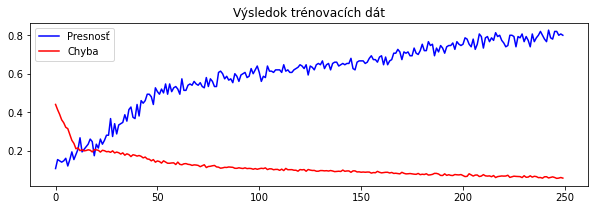

In [29]:
plt.plot(history.history['accuracy'], label='Presnosť', color='blue')
plt.plot(history.history['loss'], label='Chyba', color='red')
plt.title('Výsledok trénovacích dát')
plt.legend()
plt.show()

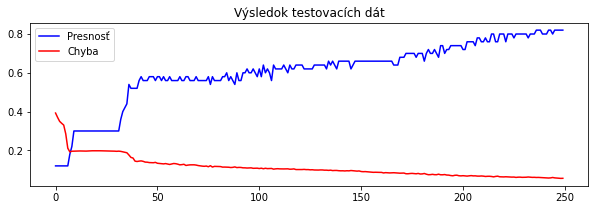

In [30]:
plt.plot(history.history['val_accuracy'], label='Presnosť', color='blue')
plt.plot(history.history['val_loss'], label='Chyba', color='red')
plt.title('Výsledok testovacích dát')
plt.legend()
plt.show()

# Výsledok

- Neurónová sieť mala veľmi vysokú 86 % prenosť a nízku chybovosť, ktorá sa každou epochou blížila k nule.
- Dáta nebolo náročné spracovať